In [1]:
# Import Packages

install.packages("maps")
install.packages("mapproj")


The downloaded binary packages are in
	/var/folders/t3/cdmn54254yd2l8n5xjg0wwmw0000gn/T//RtmpTnwiPM/downloaded_packages

The downloaded binary packages are in
	/var/folders/t3/cdmn54254yd2l8n5xjg0wwmw0000gn/T//RtmpTnwiPM/downloaded_packages


In [2]:
library(readr)
library(tidyverse)
library(maps)
library(mapproj)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v purrr     1.0.2
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map




In [3]:
us_states<- map_data("state")

In [4]:
m1 <- ggplot(data=us_states, aes(x=long, y=lat, group=region)) +
  geom_polygon(fill="white", color="black", linewidth=0.1) +
  theme_void()

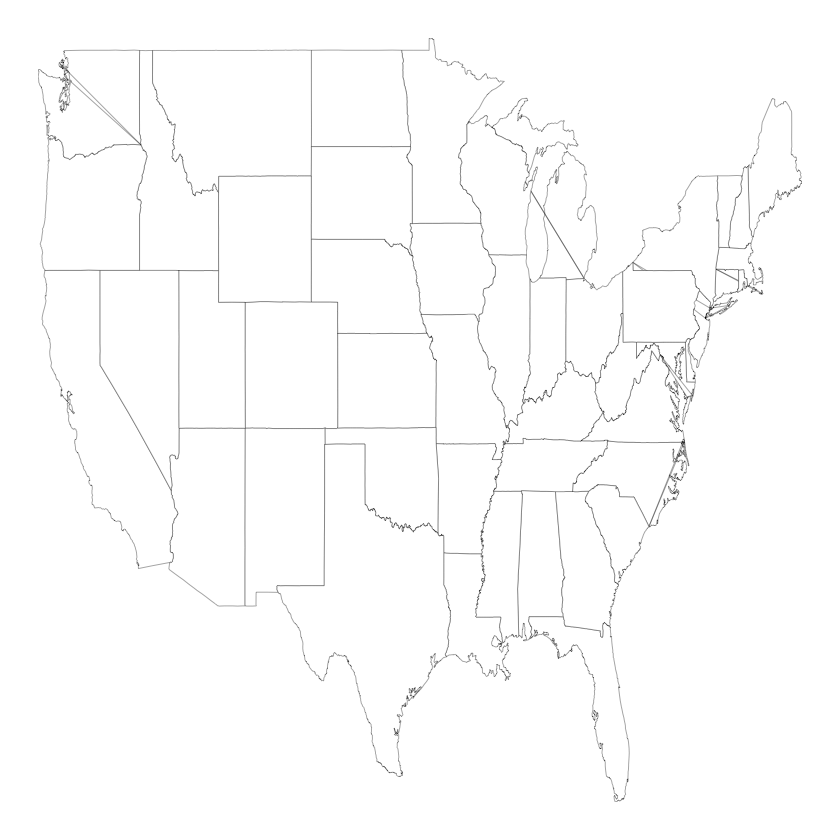

In [5]:
m1

In [6]:
# Plot the map with Albers projection

m2 <- m1 + coord_map("albers", lat0=39, lat1=45)

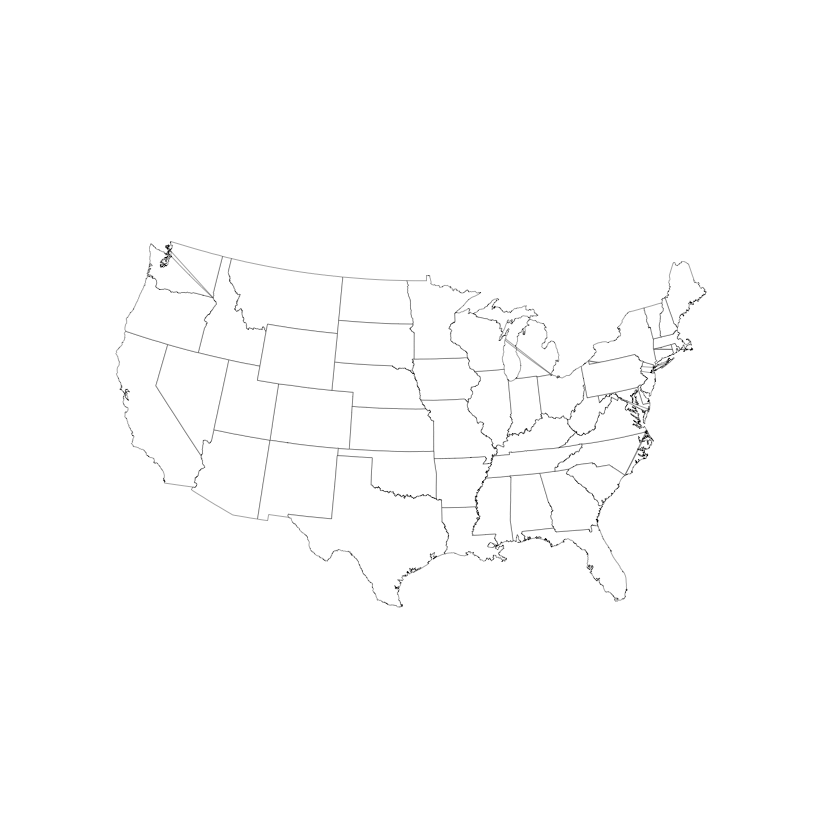

In [7]:
m2

In [8]:
# Plot the map with Georgia

ga <- subset(us_states, region %in% c("georgia"))

# Plot the map with Georgia

m3 <- ggplot(data=ga, aes(x=long, y=lat, group=region)) +
  geom_polygon(fill="white", color="black", linewidth=0.1) +
  theme_void()

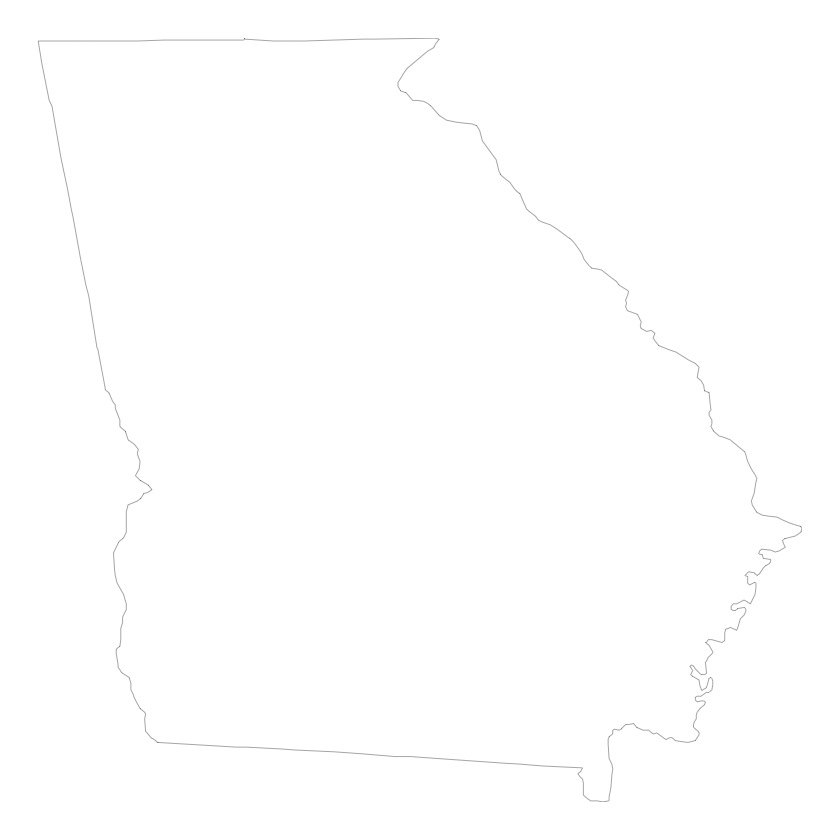

In [9]:
m3

In [10]:
# Overlay Data on the Map

election <- read.csv("us_election_results_2016.csv")

# Merge election with us_states

# Capitalize the state names in us_states

us_states <- rename(us_states, state=region)

library(tools)

us_states$state <- toTitleCase(us_states$state)

# Merge the data

us_states_merged <- merge(us_states, election, by="state")

# Plot the map

m4 <- ggplot(data=us_states_merged, aes(x=long, y=lat, group=state, fill=winner)) +
  geom_polygon(color="black", linewidth=0.1) +
  theme_void() +
coord_map("albers", lat0=39, lat1=45)

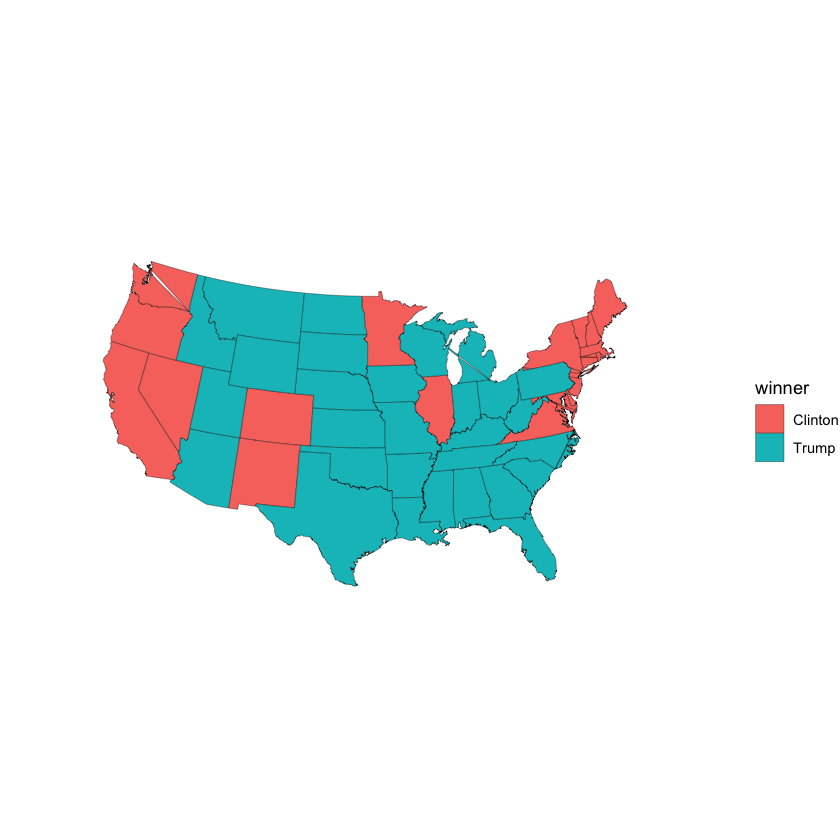

In [11]:
m4

In [12]:
# Change Color

m5 <- m4 + scale_fill_manual(values=c("blue", "red"), name="Winner", labels=c("Trump","Clinton"))

# Change Legend Position

m6 <- m5 + theme(legend.position="bottom")


# Plot pct_trump : Continuous Variable 

m7 <- ggplot(data=us_states_merged, aes(x=long, y=lat, group=state, fill=pct_trump)) +
  geom_polygon(color="black", linewidth=0.1) +
  theme_void() +
  coord_map("albers", lat0=39, lat1=45) +
  scale_fill_gradient(low="blue", high="red", name="Trump %")

# Change Label Name

m8 <- m7 + labs(fill=" Percentage Trump" )

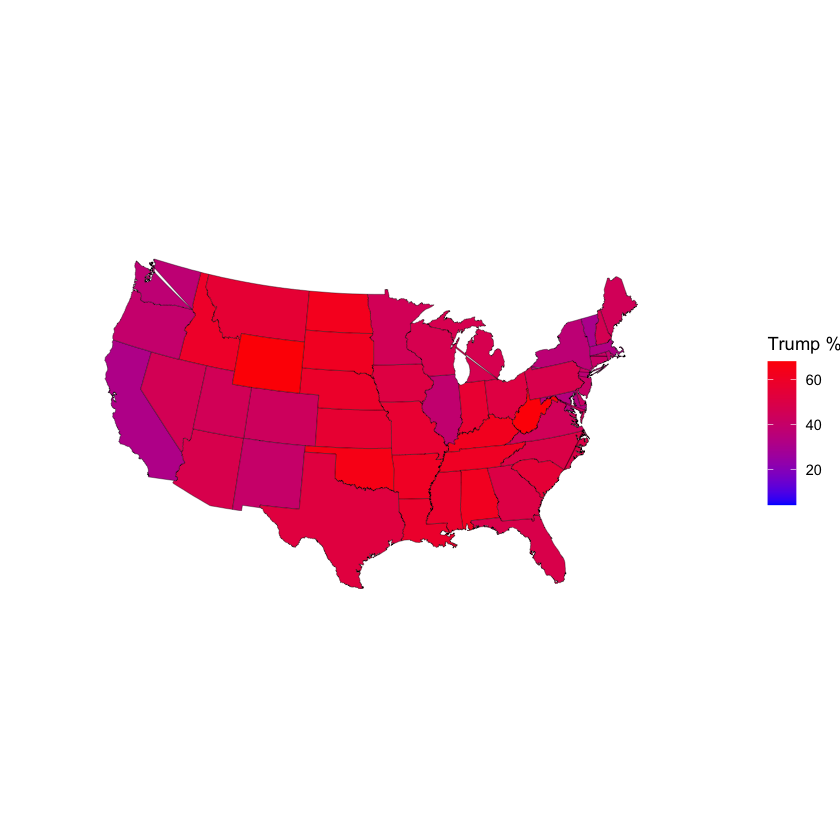

In [13]:
m8